In [6]:
import numpy as np
import pandas as pd
from supervenn import supervenn
import matplotlib.pyplot as plt

from sys import path
path.append('../utils/')

from utils import load_preds, get_datatasets

In [7]:
DATASETS = ["20ng", "acm", "webkb", "reut"]

ALGORITHMS = ["centroide", "gbm", "knn", "lr", "rf", "svm", "bert"]

BERT_ALGS = ["gbm", "knn", "lr", "rf", "svm", "bert"]

In [8]:
d_preds = load_preds(DATASETS, ALGORITHMS)

LOADING PREDS FROM SCRATCH


280it [00:00, 3190.07it/s]


In [9]:
df = pd.DataFrame(d_preds["webkb"])
df.head()

,centroide,gbm,knn,lr,rf,svm,bert
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [10]:
pd_datasets = get_datatasets(DATASETS)

In [29]:
def get_sets(preds, y):
    comp = preds == y[:, None]
    lsets = []
    for col, preds in zip(df.columns, comp.T):
        lsets.append(set(np.where(preds)[0].tolist()))
    return lsets

def plot_supervenn(lsets, labels, title=None):

    plt.figure(figsize=(42, 8))
    plt.title(title, fontsize=16)
    supervenn(lsets, labels, chunks_ordering='size', widths_minmax_ratio=0.11)

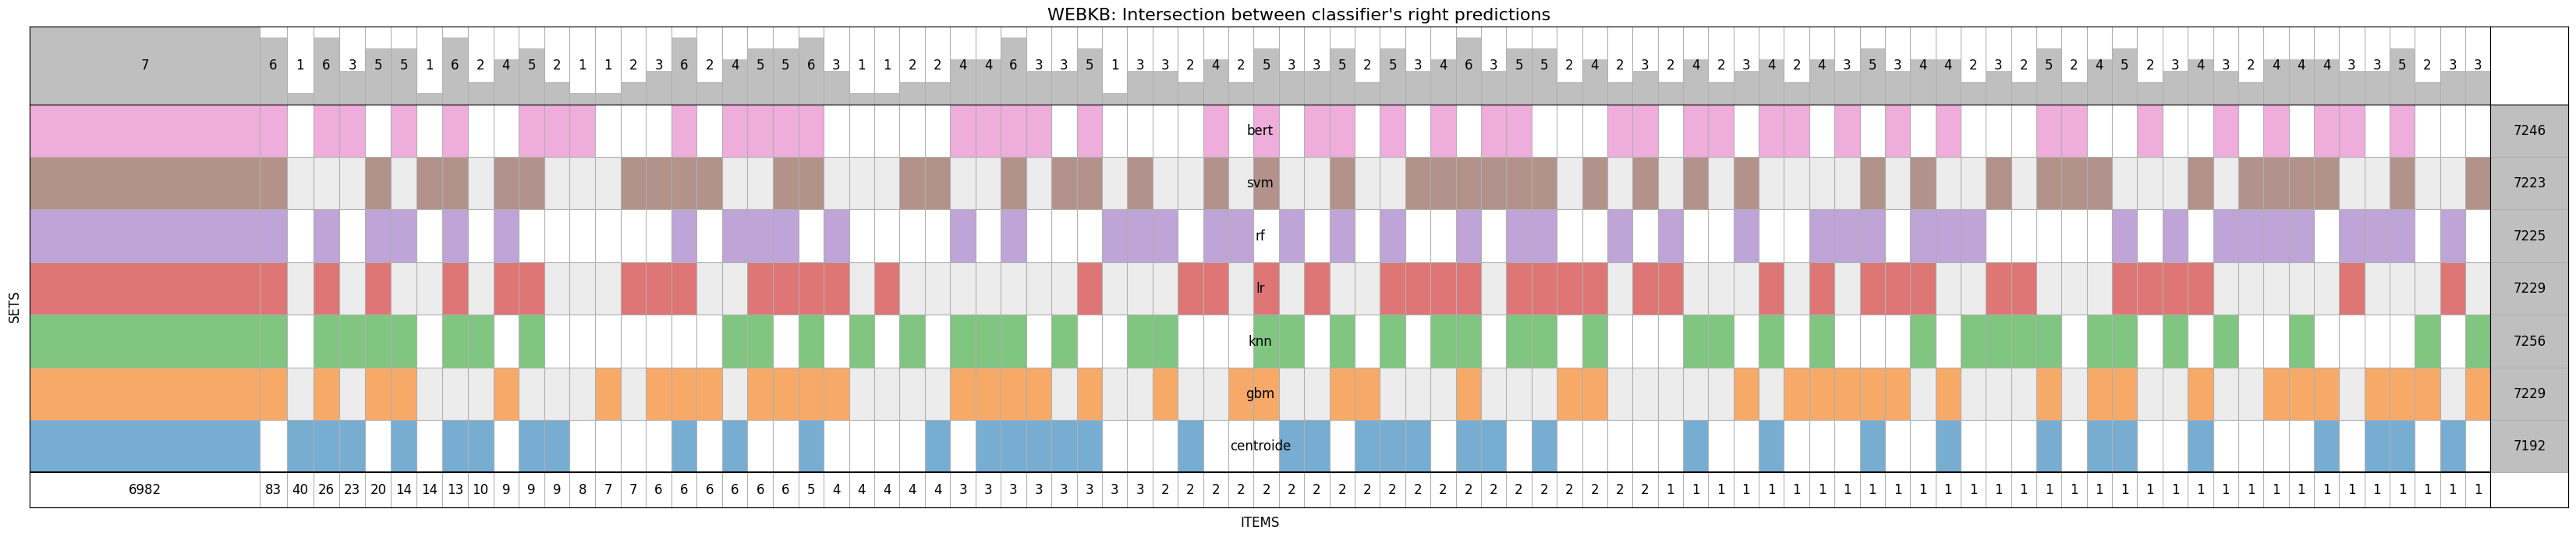

In [30]:
dset = "webkb"
df = pd.DataFrame(d_preds[dset])
lsets = get_sets(df.values, pd_datasets[dset].classes.values)
plot_supervenn(lsets, list(df.columns), title=f"{dset.upper()}: Intersection between classifier's right predictions")

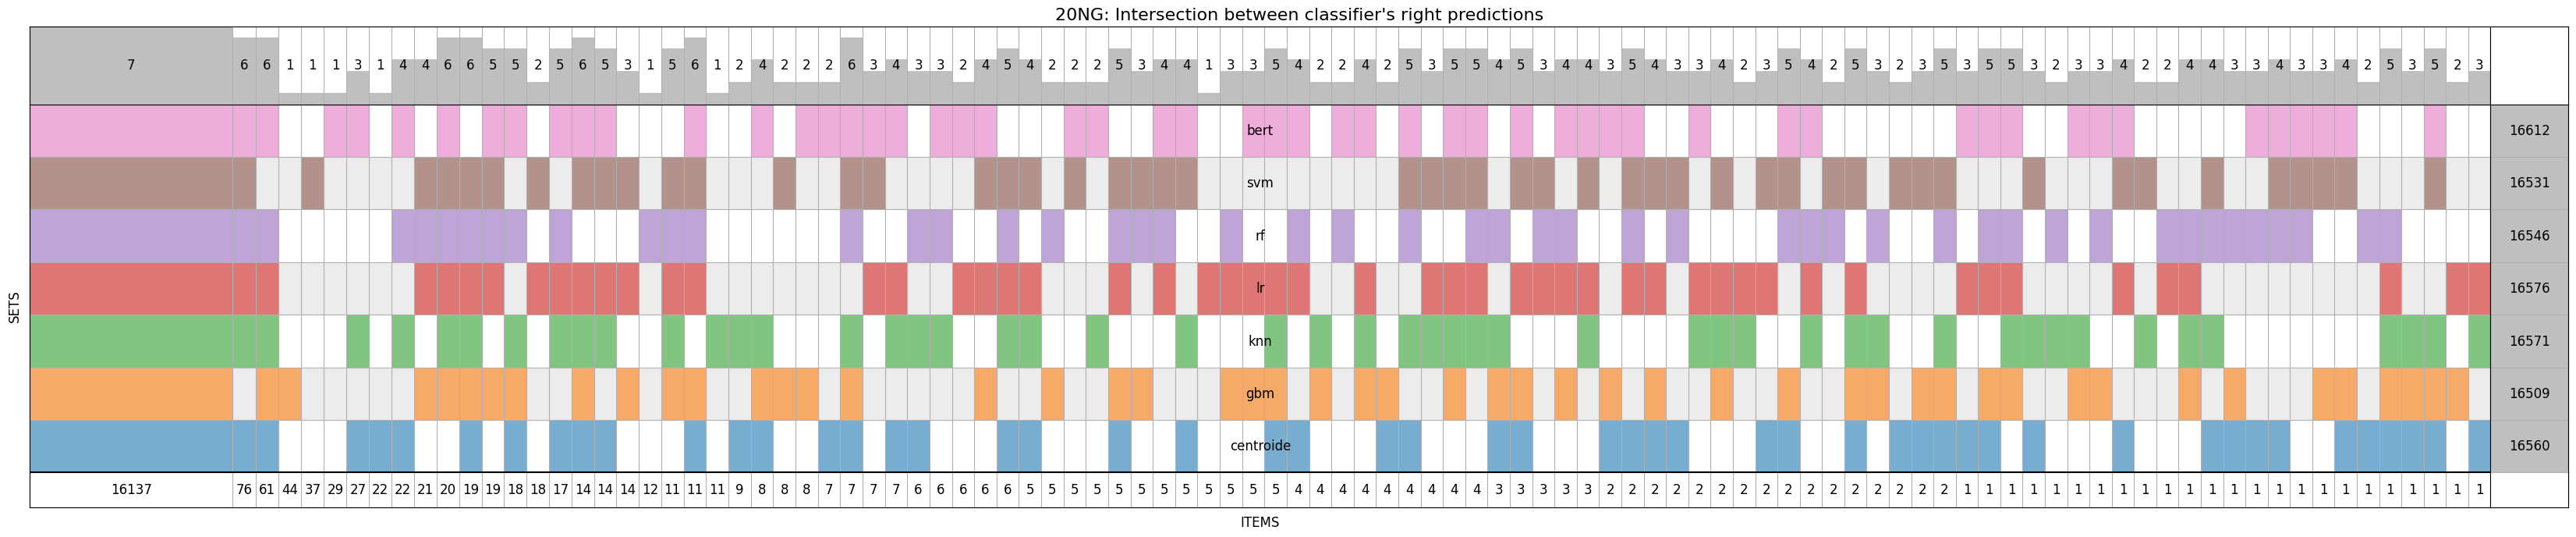

In [31]:
dset = "20ng"
df = pd.DataFrame(d_preds[dset])
lsets = get_sets(df.values, pd_datasets[dset].classes.values)
plot_supervenn(lsets, list(df.columns), title=f"{dset.upper()}: Intersection between classifier's right predictions")

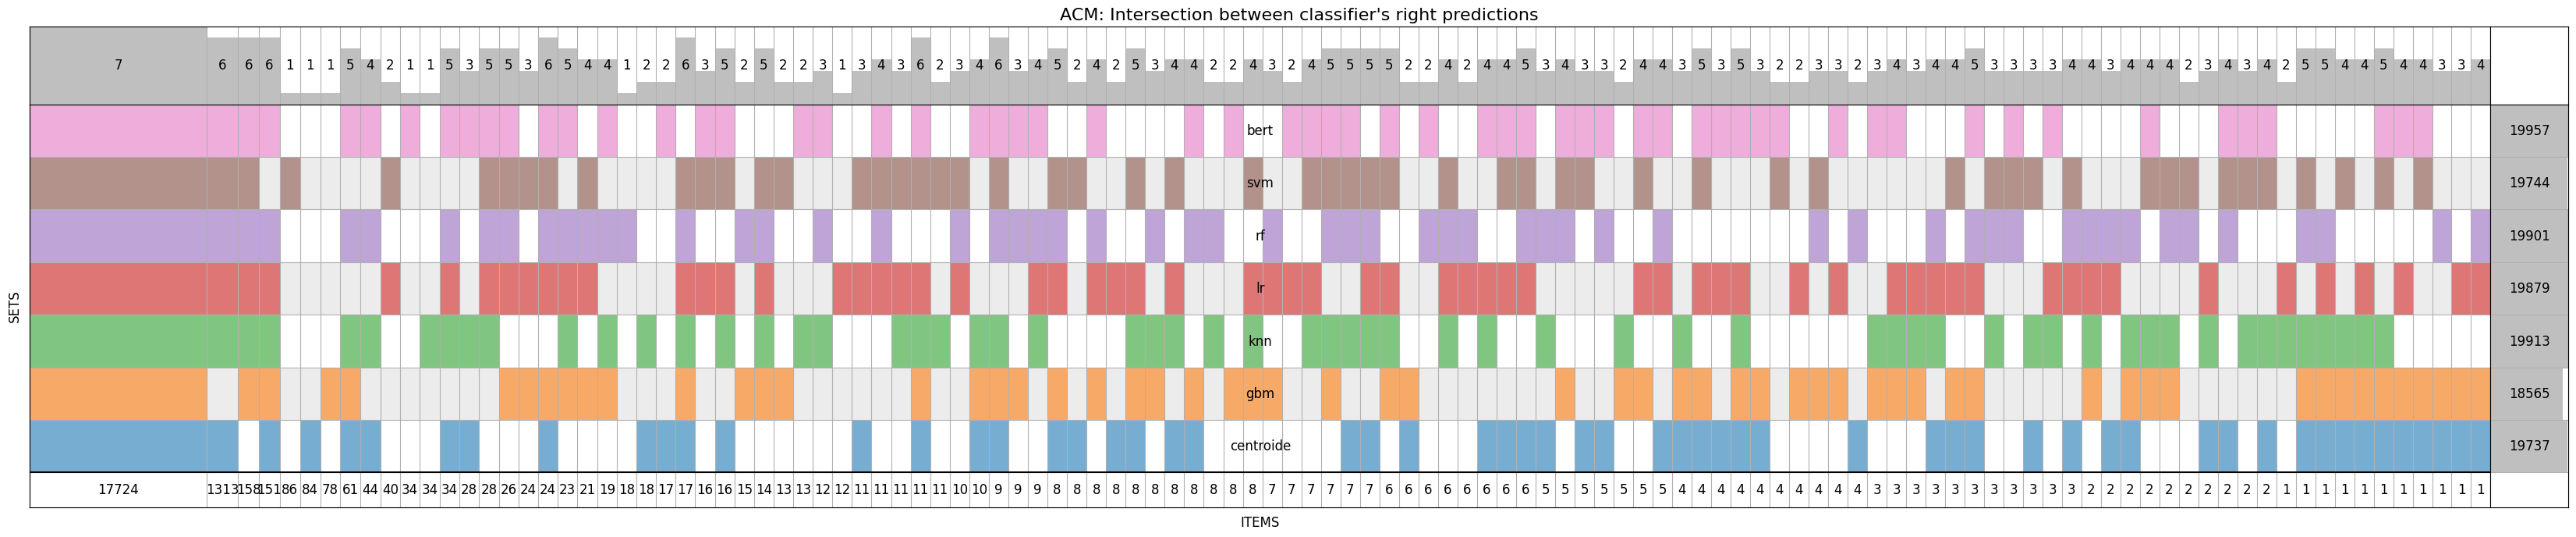

In [32]:
dset = "acm"
df = pd.DataFrame(d_preds[dset])
lsets = get_sets(df.values, pd_datasets[dset].classes.values)
plot_supervenn(lsets, list(df.columns), title=f"{dset.upper()}: Intersection between classifier's right predictions")

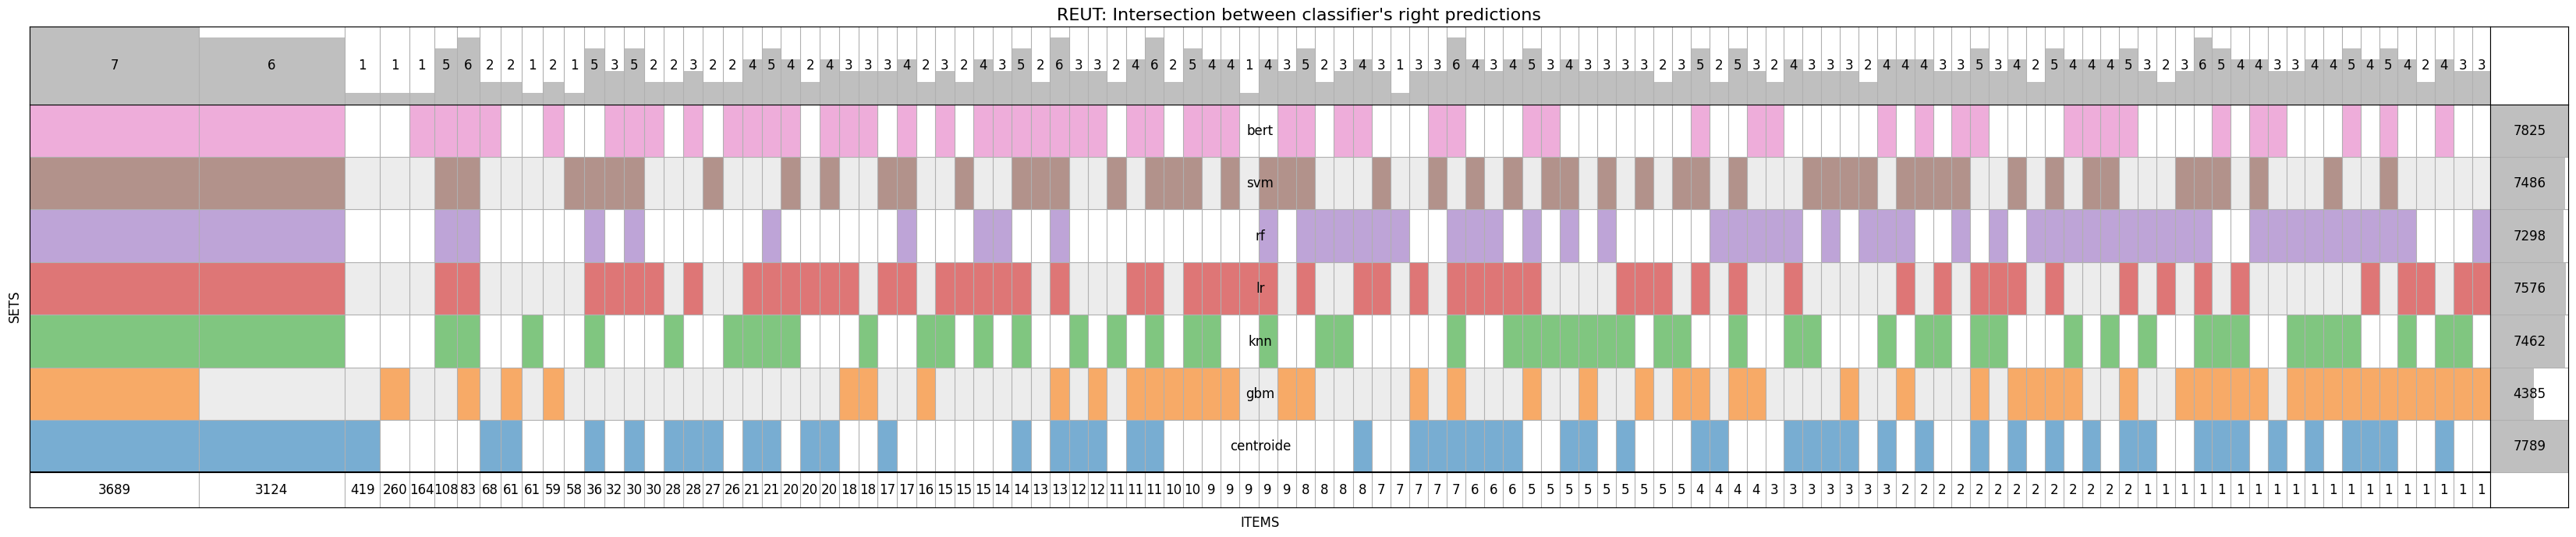

In [33]:
dset = "reut"
df = pd.DataFrame(d_preds[dset])
lsets = get_sets(df.values, pd_datasets[dset].classes.values)
plot_supervenn(lsets, list(df.columns), title=f"{dset.upper()}: Intersection between classifier's right predictions")

In [34]:
d_preds

{'20ng': {'centroide': array([ 0,  0,  0, ..., 19, 19, 19]),
  'gbm': array([ 0,  0,  0, ..., 19, 19, 19]),
  'knn': array([ 0,  0,  0, ..., 19, 19, 19]),
  'lr': array([ 0,  0, 13, ..., 19, 19, 19]),
  'rf': array([ 0,  0,  0, ..., 19, 19, 19]),
  'svm': array([ 0,  0, 13, ..., 19, 19, 19]),
  'bert': array([ 0,  0, 13, ..., 19, 19, 19])},
 'acm': {'centroide': array([6, 6, 6, ..., 7, 2, 0]),
  'gbm': array([6, 6, 6, ..., 7, 2, 0]),
  'knn': array([6, 6, 6, ..., 7, 2, 0]),
  'lr': array([6, 6, 6, ..., 7, 2, 0]),
  'rf': array([6, 6, 6, ..., 7, 2, 0]),
  'svm': array([6, 6, 6, ..., 7, 2, 0]),
  'bert': array([6, 8, 6, ..., 7, 2, 0])},
 'webkb': {'centroide': array([0, 0, 0, ..., 6, 6, 6]),
  'gbm': array([0, 0, 0, ..., 6, 6, 6]),
  'knn': array([0, 0, 0, ..., 6, 6, 6]),
  'lr': array([0, 0, 1, ..., 6, 6, 6]),
  'rf': array([0, 0, 0, ..., 6, 6, 6]),
  'svm': array([0, 0, 1, ..., 6, 6, 6]),
  'bert': array([0, 0, 0, ..., 6, 6, 6])},
 'reut': {'centroide': array([44, 77, 24, ..., 89, 89, 